# Optimization of the XGBoost algorithm

In [3]:
run init.ipynb

Done.


# Cohort description 

In [23]:
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario ='multimodal_2023_regular',
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

In [8]:
data.filter(administration={'studies':  ['ARC', 'P1', 'P2', 'P3'],
                                        'order': 'first',
                            'completed': True}, 
               demographics={'age':[15, 39]},
                clinical={'diagnosis': [0, 1]},
                verbose=True)

display(data.df.groupby(data.outcome_column)[['id']].count())

,id
diagnosis,
0.0,328
1.0,49


In [3]:
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023_regular_ddld', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

data.df = data.df.replace({'primary_education': {0: 'Unknown',
                                       1: 'Without High School Diploma',
                                       2: 'Without High School Diploma',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})


display(data.df.groupby('study')[['id']].count())

,id
study,
ARC,48
P1,426
P2,1


In [6]:
data.df[data.df['study'] == 'P2']

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,remote,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx,administration_number,S_postural_sway,NS_postural_sway,S_postural_sway_derivative,NS_postural_sway_derivative,gaze_silhouette_score,inv_S_gaze_percent_right,mean_gaze_percent_right,S_postural_sway_complexity,NS_postural_sway_complexity,S_facing_forward,NS_facing_forward,S_eyebrows_complexity,NS_eyebrows_complexity,S_mouth_complexity,NS_mouth_complexity,S_postural_sway_conf,NS_postural_sway_conf,S_postural_sway_derivative_conf,NS_postural_sway_derivative_conf,gaze_silhouette_score_conf,mean_gaze_percent_right_conf,FP_gaze_speech_correlation_conf,S_facing_forward_conf,NS_facing_forward_conf,S_eyebrows_complexity_conf,NS_eyebrows_complexity_conf,S_mouth_complexity_conf,NS_mouth_complexity_conf,S_postural_sway_complexity_conf,NS_postural_sway_complexity_conf,RTN_conf,touch_conf,Z_mean_gaze_percent_right,Z_gaze_silhouette_score,Z_FP_gaze_speech_correlation,Z_proportion_of_name_call_responses,Z_average_response_to_name_delay,Z_S_postural_sway,Z_NS_postural_sway,Z_S_postural_sway_derivative,Z_NS_postural_sway_derivati

In [7]:
data.df[DEMOGRAPHIC_COLUMNS]

,age,sex,ethnicity,race,primary_education
0,24.262295,1.0,0.0,0.0,4-Year College Degree or More
1,30.754098,0.0,0.0,0.0,4-Year College Degree or More
2,25.245902,0.0,0.0,0.0,4-Year College Degree or More
3,29.901639,0.0,0.0,1.0,4-Year College Degree or More
4,24.721311,1.0,1.0,0.0,4-Year College Degree or More
...,...,...,...,...,...
470,18.098361,1.0,0.0,0.0,4-Year College Degree or More
471,18.065574,1.0,1.0,0.0,4-Year College Degree or More
472,31.180328,0.0,0.0,0.0,4-Year College Degree or More
473,22.032787,0.0,0.0,2.0,4-Year College Degree or More


In [14]:
from utils import select
select(select(df, 'diagnosis', 0), 'mchat_result', 1)

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,remote,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx,administration_number,S_postural_sway,NS_postural_sway,S_postural_sway_derivative,NS_postural_sway_derivative,gaze_silhouette_score,inv_S_gaze_percent_right,mean_gaze_percent_right,S_postural_sway_complexity,NS_postural_sway_complexity,S_facing_forward,NS_facing_forward,S_eyebrows_complexity,NS_eyebrows_complexity,S_mouth_complexity,NS_mouth_complexity,S_postural_sway_conf,NS_postural_sway_conf,S_postural_sway_derivative_conf,NS_postural_sway_derivative_conf,gaze_silhouette_score_conf,mean_gaze_percent_right_conf,FP_gaze_speech_correlation_conf,S_facing_forward_conf,NS_facing_forward_conf,S_eyebrows_complexity_conf,NS_eyebrows_complexity_conf,S_mouth_complexity_conf,NS_mouth_complexity_conf,S_postural_sway_complexity_conf,NS_postural_sway_complexity_conf,RTN_conf,touch_conf,Z_mean_gaze_percent_right,Z_gaze_silhouette_score,Z_FP_gaze_speech_correlation,Z_proportion_of_name_call_responses,Z_average_response_to_name_delay,Z_S_postural_sway,Z_NS_postural_sway,Z_S_postural_sway_derivative,Z_NS_postural_sway_derivati

In [15]:
def print_group_distribution(df, attribute, name, attribute_type):   
    df = df.replace({'primary_education': {0: 'Unknown',
                                       1: 'Without High School Diploma',
                                       2: 'Without High School Diploma',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})
    
    df = df.replace({'race': {0: 'White',
                                       1: 'Black/African American',
                                       2: 'More than one race',
                                       1: 'Without',
                                       1: 'Without',
                                       1: 'Without',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})
    
    print("\n#### {} ####".format(name))

    if attribute_type.lower() == 'numerical':
        df_mean = df[attribute].mean()
        df_std = df[attribute].std()
        df_missing =  df[attribute].isna().sum()



        print(df_mean, df_std, df_missing, "{}".format(df_missing/len(df)))

    elif attribute_type.lower() == 'categorical':
        df_freq = df[attribute].value_counts(dropna=False).rename('frequency')
        df_perc = df[attribute].value_counts(normalize=True, dropna=False).rename('percentage') * 100
        df_missing =  df[attribute].isna().sum()
        print(pd.concat([df_freq, df_perc], axis=1), df_missing)

    else:
        print('Warning, attribute type not recognized.')

attributes_list = ['age',  'sex', 'race', 'ethnicity', 'primary_education', 'mchat_result', 
                   'ados_total' , 'ados_rrb' , 'ados_sa' , 'mullen_elc_std', 'mullen_el',
                   'mullen_rl', 'mullen_fm', 'mullen_vr']
attributes_names = ['Age','Sex', 'Race', 'Ethnicity', 'Primary Education', 'MCHAT R/F',
                    'ADOS-2 Calibrated Severity Score','ADOS-2 RRB', 'ADOS-2 SA',  'Mullen Scales of Early Learning', 'Expressive Language T-Score',
                    'Receptive Language T-Score', 'Fine Motor T-Score', 'Visual Reception T-Score']
attributes_type = ['Numerical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical',
                   'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical','Numerical', 'Numerical', 'Numerical', 'Categorical','Numerical', 'Numerical', 'Numerical',
                  'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical']

#df = results_young[results_young['diagnosis']!='DDLD']
#df = df_results[df_results['diagnosis']!='DDLD']
df = data.df


for diagnosis in [0, 1, 2]:
    print("\n\n\n\nDIAGNOSIS: {}".format(diagnosis))
    for att, att_name, att_type in zip(attributes_list, attributes_names, attributes_type):
        print_group_distribution(df[df['diagnosis']==diagnosis], att, att_name, att_type)






DIAGNOSIS: 0

#### Age ####
20.414934026389442 3.013451645553562 0 0.0

#### Sex ####
     frequency  percentage
1.0        170   51.829268
0.0        158   48.170732 0

#### Race ####
                                frequency  percentage
White/Caucasian                       255   77.743902
More than one race                     32    9.756098
Black/African American                 28    8.536585
Other                                   6    1.829268
Asian                                   6    1.829268
American Indian/Alaskan Native          1    0.304878 0

#### Ethnicity ####
     frequency  percentage
0.0        306   93.292683
1.0         22    6.707317 0

#### Primary Education ####
                                   frequency  percentage
4-Year College Degree or More            281   85.670732
Some College Education                    32    9.756098
High School Diploma or Equivalent         12    3.658537
NaN                                        2    0.609756
Without High 

# Correlations between features 

In [9]:

    
use_weight = False
if use_weight:
    weighted_confidence_score = np.load(os.path.join(DATA_DIR, 'multimodal_paper', 'weight_multimodal.npy'))
else:
    weighted_confidence_score = None
    

df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='without',
               imputation_method='without',
               sampling_method='without',
               scenario = 'multimodal_2023_regular_ddld', 
               positive_class = [1],
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=False,
               verbosity=1, 
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='15_December_final_regular_weighted_K50', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'Supreme',
                  verbosity=1, 
                  save_experiment=False)



In [86]:
len(data.features_name)

27

In [87]:
import missingno as msno
df_X = exp.dataset.df[['age'] + data.features_name[:-4]]


def custom_spearmanr(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').correlation

def custom_spearmanr_pvalue(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').pvalue

# Computes feature correlation
df_corr = df_X.corr(method=custom_spearmanr)
df_corr.rename(columns=feature_name_mapping, index=feature_name_mapping, inplace=True)
df_corr.rename(columns={'age':'Age'}, index={'age':'Age'}, inplace=True)

df_p = df_X.corr(method=custom_spearmanr_pvalue)

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.3, "W", "")))

labels_p = np.where(df_p>0.05, "",
                  np.where(df_p>0.01, "*",
                           np.where(df_p>0.001, "**", 
                                    np.where(df_p>0.0000000000000000000000001, "***",""))))





In [91]:
label_final.shape

(20, 20)

In [92]:
label_final = np.zeros_like(labels_p)
for i in range(label_final.shape[0]):
    for j in range(label_final.shape[0]):
        label_final[i,j] = labels[i, j] + ' ' + labels_p[i, j]

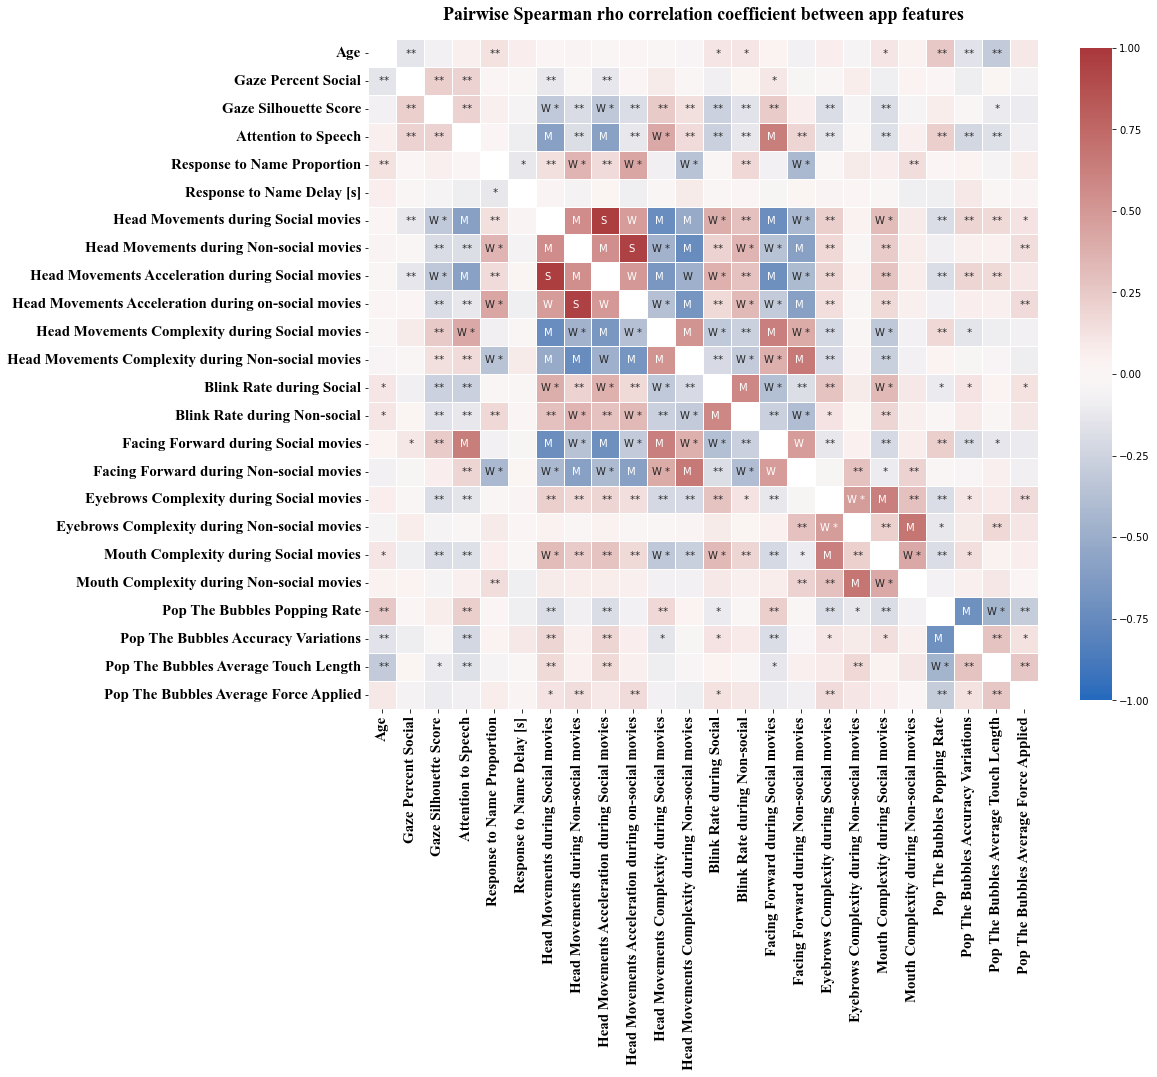

In [94]:
# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,vmin=-1, vmax=1,
            center=0, annot=label_final, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});
csfont = {'fontname':'Times New Roman'}
plt.gca().set_xticks(plt.gca().get_xticks(), df_corr.index, weight='bold', fontsize=15, **csfont)
plt.gca().set_yticks(plt.gca().get_yticks(), df_corr.index, weight='bold', fontsize=15, **csfont)
plt.title("Pairwise Spearman rho correlation coefficient between app features", weight='bold', y=1.02, fontsize=18, **csfont)

plt.savefig(os.path.join(ROOT_DIR, 'figures_final', 'pairwise_spearman.png'), dpi=200, bbox_inches = 'tight')

,rate
age,0.000000
Head movements acceleration during non-social movies,0.000000
Head movements during non-social movies,0.000000
Response to name proportion,0.007958
Eyebrows predictability during non-social movies,0.010610
Facing forward during non-social movies,0.010610
Head movements predictability during non-social movies,0.010610
Mouth predictability during non-social movies,0.010610
Head movements during social movies,0.047745
Head movements acceleration during social movies,0.047745


In [14]:
df_X = exp.dataset.df[data.features_name[:-4]]


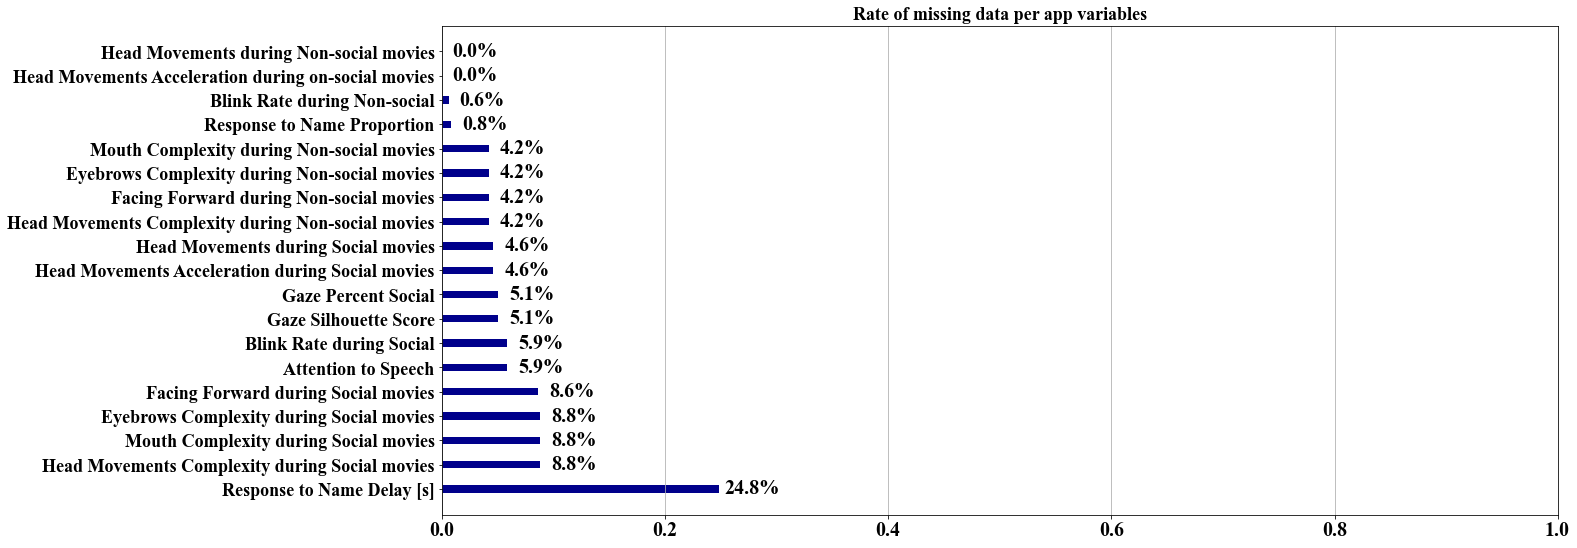

In [17]:
df_X = data.df[data.features_name[:-4]]




df_X.rename(columns=feature_name_mapping, index=feature_name_mapping, inplace=True)
df_X.rename(columns={'age':'Age'}, inplace=True)

df_X.isna().mean().sort_values()

df_missing = pd.DataFrame(df_X.isna().mean().sort_values(), columns=['rate'])

csfont = {'fontname':'Times New Roman'}
from matplotlib import rc
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(20, 9))

y = len(df_missing)
left = 0
for i, row in df_missing.iterrows():

    plt.barh(y, row['rate'], height=0.3, color = 'darkblue')# if row['shap']>0 else 'left', color='red')
    pos_offset = 0.03
    plt.annotate("{:.1f}%".format(row['rate']*100),(row['rate']+pos_offset, y-0.2),ha="center", color = 'k', fontsize=20, weight='bold', **csfont)
    y-=1

plt.yticks(ticks = list(reversed(range(1,len(df_missing)+1))), labels = df_missing.index, weight='bold', fontsize=20, **csfont)
plt.xticks(weight='bold', fontsize=20, **csfont)
plt.xlim([0, 1])
plt.gca().xaxis.grid(True)  #plt.grid()
plt.gca().set_yticks(plt.gca().get_yticks(), df_missing.index, weight='bold', fontsize=18, **csfont)
plt.title("Rate of missing data per app variables", weight='bold', fontsize=18, **csfont)
#plt.title(title,weight="bold", fontsize=22, **csfont)
plt.savefig(os.path.join(ROOT_DIR, 'figures_final', 'missingness.png'), dpi=200, bbox_inches = 'tight')

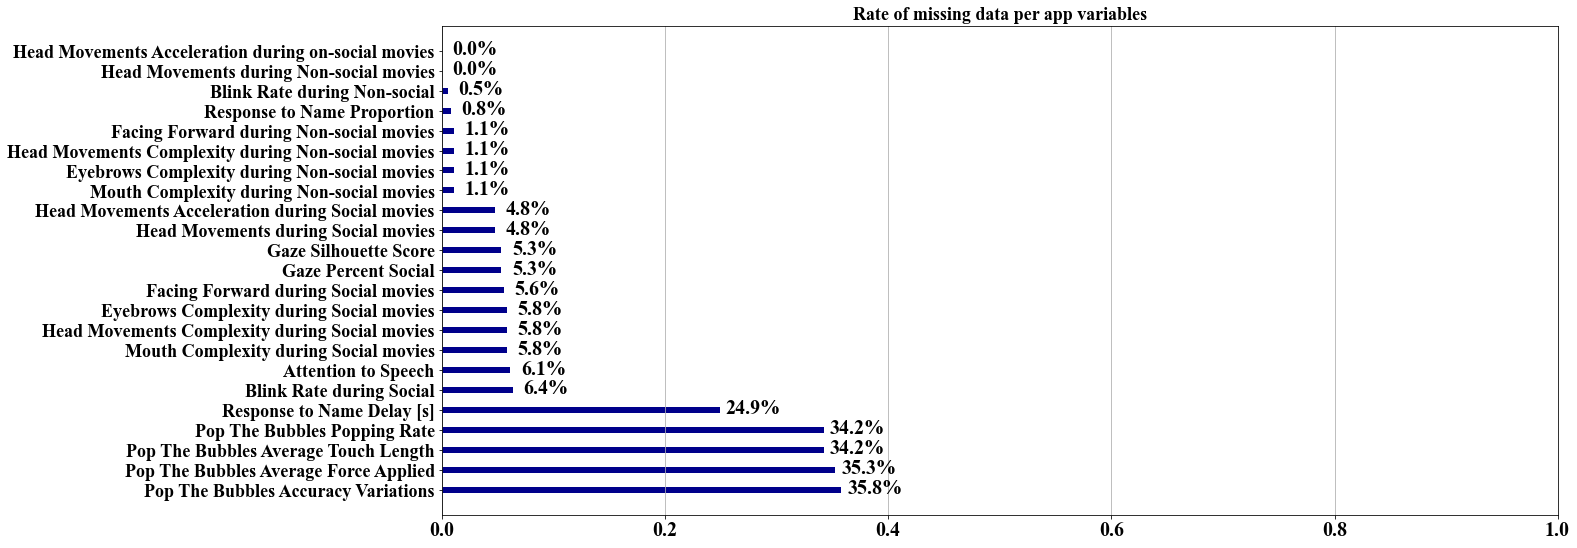

In [95]:
df_X = data.df[data.features_name[:-4]]




df_X.rename(columns=feature_name_mapping, index=feature_name_mapping, inplace=True)
df_X.rename(columns={'age':'Age'}, inplace=True)

df_X.isna().mean().sort_values()

df_missing = pd.DataFrame(df_X.isna().mean().sort_values(), columns=['rate'])

csfont = {'fontname':'Times New Roman'}
from matplotlib import rc
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(20, 9))

y = len(df_missing)
left = 0
for i, row in df_missing.iterrows():

    plt.barh(y, row['rate'], height=0.3, color = 'darkblue')# if row['shap']>0 else 'left', color='red')
    pos_offset = 0.03
    plt.annotate("{:.1f}%".format(row['rate']*100),(row['rate']+pos_offset, y-0.2),ha="center", color = 'k', fontsize=20, weight='bold', **csfont)
    y-=1

plt.yticks(ticks = list(reversed(range(1,len(df_missing)+1))), labels = df_missing.index, weight='bold', fontsize=20, **csfont)
plt.xticks(weight='bold', fontsize=20, **csfont)
plt.xlim([0, 1])
plt.gca().xaxis.grid(True)  #plt.grid()
plt.gca().set_yticks(plt.gca().get_yticks(), df_missing.index, weight='bold', fontsize=18, **csfont)
plt.title("Rate of missing data per app variables", weight='bold', fontsize=18, **csfont)
#plt.title(title,weight="bold", fontsize=22, **csfont)
plt.savefig(os.path.join(ROOT_DIR, 'figures_final', 'missingness.png'), dpi=200, bbox_inches = 'tight')

# EHR Data verification of the diagnosis


In [195]:
df =  pd.read_csv(AUTISM_DATA_PATH)
df[df.diagnosis.isna()]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity
798,IMP001,NaN,English,2.0,<Subject.S2KSubject object at 0x7fea9191c3d0>,<Administration.S2KAdministration object at 0x...,1,1,NaN,Baseline,2019-11-04,NaN,IMPACT,Preschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.372021,0.494525,0.267790,0.510585,0.367273,0.561994,1.000000,1.512622,"[1, 1, 1]",1.582021,0.020940,1.578227,0.008215,4.921483,0.026502,1.371391,0.009215,1.079642,0.004036,NaN,NaN,1.973891,0.011711,5.154798,0.022791,7.588681,0.026074,2.766019,0.013521,4.123896,0.018412,41.0,2.487457,3.275710,8.578470,4.774662,34.0,0.951220,0.036439,0.039872,1.592656,0.274305,0.057143,0.878049,0.147059,0.036439,0.039872,0.193780,0.238740,0.005114,0.138189,1.205882,0.404345,0.422429,0.118088,66.666667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,IMP002,NaN,English,2.0,<Subject.S2KSubject object at 0x7fea9191c410>,<Administration.S2KAdministration object 

In [185]:
df['diagnosis'].unique()

array(['ASD', 'DDLD', 'TD', 'Other', 'ADHD', nan], dtype=object)

In [250]:
df =  pd.read_csv(AUTISM_DATA_PATH)


# Load EHR data and reformat
ehr_data = pd.read_csv("/home01/sam/notes_on_stats/data/P1_EHR_FINAL.csv")
ehr_data.rename(columns={'ace_id':'id'}, inplace=True)
ehr_data['id'] = ehr_data['id'].astype(str)

# First we select the app data that are included in the EHR dataset
df_merge = pd.merge(df, ehr_data, how='left', on='id')

# Remove duplicates since in the app dataset a subjects may have several rows for several administrations
if True:
    df_merge.drop_duplicates(subset='id', inplace=True)
    

# Sanity check: Does all the ASD have a asd_dx to 1 ? 
print("Subjects diagnosed with ASD as per our data but not ASD as per the EHR: {}".format(len(select(select(df_merge, 'diagnosis', 'ASD'), 'asd_dx', 0))))

# Subjects with TD diagnosis actually having ASD:
print("Subjects with TD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'TD'), 'asd_dx', 1))))

# Subjects with Unknown diagnosis actually having ASD:
print("Subjects with Unknown diagnosis actually having ASD: {}".format(len(select(df_merge[(df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull())], 'asd_dx', 1))))

# Subjects with ADHD actually having ASD:
print("Subjects with ADHD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'ADHD'), 'asd_dx', 1))))

# Subjects with DDLD actually having ASD:
print("Subjects with DDLD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'DDLD'), 'asd_dx', 1))))

# Subjects with Unknown diagnosis actually having DDLD:
print("Subjects with Unknown diagnosis actually having DDLD: {}".format(len(select(df_merge[(df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull())], 'ddld_dx', 1))))

# Set the unknown diagnosis or TD having ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the unknown diagnosis or TD having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the unknown diagnosis or TD having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'


# Set the DDLD with ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'DDLD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the TD diagnosis having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the TD diagnosis having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'ADHD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'




Subjects diagnosed with ASD as per our data but not ASD as per the EHR: 9
Subjects with TD diagnosis actually having ASD: 2
Subjects with Unknown diagnosis actually having ASD: 10
Subjects with ADHD diagnosis actually having ASD: 1
Subjects with DDLD diagnosis actually having ASD: 3
Subjects with Unknown diagnosis actually having DDLD: 21


In [248]:
df_merge[((df_merge['diagnosis'].isna()) | 
         (df_merge['diagnosis'] == 'Other')) & 
        
        (df_merge['age'] >=17) 
        ]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex_x,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,sex_y,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
61,810064,Other,English,1.9,<Subject.S2KSubject object at 0x7fea91cf0410>,<Administration.S2KAdministration object at 0x...,1,1,24.065574,Admin1,2019-04-01,NaN,P1,Preschool,M,Not Hispanic/Latino,White/Caucasian,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,49.0,57.0,0.0,0.0,3.0,2.0,1.0,0.333678,0.352131,0.413492,0.549580,0.416127,0.569748,0.666667,1.685017,"[1, 1, 1]",0.870331,0.004185,0.215679,0.000407,0.412639,0.002724,0.115253,0.000215,0.651970,0.003462,NaN,NaN,0.140010,0.000257,0.148939,0.000315,0.814999,0.005206,0.163811,0.000428,0.214860,0.001061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Complete (Do not readminister),In a calm and/or good mood,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Loud and busy time of day - a lot of backgroun...,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [182]:


# First we select the app data that are included in the EHR dataset
df_merge = pd.merge(df, ehr_data, how='left', on='id')

# Set the unknown diagnosis or TD having ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the DDLD with ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'DDLD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the TD diagnosis having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the TD diagnosis having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'ADHD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'


In [158]:
diagnosis_category

['ASD', 'DDLD', 'TD', 'Other', 'ADHD', nan]

ASD ASD 34
ASD DDLD 40
ASD ADHD 5
DDLD ASD 3
DDLD DDLD 12
DDLD ADHD 1
TD ASD 2
TD DDLD 87
TD ADHD 3
Other ASD 2
Other DDLD 7
Other ADHD 1
ADHD ASD 1
ADHD DDLD 1
ADHD ADHD 0
nan ASD 8
nan DDLD 14
nan ADHD 0


,ASD,DDLD,ADHD
ASD,34.0,40.0,5.0
DDLD,3.0,12.0,1.0
TD,2.0,87.0,3.0
Other,2.0,7.0,1.0
ADHD,1.0,1.0,0.0
NaN,8.0,14.0,0.0


In [ ]:
df_merge

In [105]:
set(df_merge.id).difference(set(df.id).intersection(set(ehr_data.id)))
len(df_merge.id.unique())


df_merge[df_merge.duplicated(keep=False)]

,id,diagnosis,chart_date,age,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
503,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
504,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
505,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
506,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
507,812712,NaN,5/24/2022,NaN,43,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,852136,NaN,5/24/2022,NaN,33,0,0,0,0,0,0,0,0,0,0
574,852491,NaN,5/24/2022,NaN,31,0,0,0,0,0,0,0,0,0,0
575,852491,NaN,5/24/2022,NaN,31,0,0,0,0,0,0,0,0,0,0
577,852547,TD,5/24/2022,19.934426,30,0,0,0,0,0,0,0,0,0,0


In [95]:
len(set(df.id).intersection(set(ehr_data.id)))

526

In [35]:
set(exp.dataset.df.id.unique()).difference(set(ehr_data.id.unique()))

{'910013',
 '910040',
 '910049',
 '910077',
 '910078',
 '910098',
 '910135',
 '910162',
 '910166',
 '910183',
 '910276'}

In [76]:
select(df_merge, 'diagnosis', np.nan)

,diagnosis,chart_date,age,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx


In [81]:
df_merge[(df_merge['diagnosis'].isna()) & (df_merge['asd_dx']==1)]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex_x,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,sex_y,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
519,813183,NaN,English,3.2.6,<Subject.S2KSubject object at 0x7fea90fa0d50>,<Administration.S2KAdministration object at 0x...,0,1,NaN,Time_1,2022-02-14,17:16,P1R,Preschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,"[1, 0, 1]",0.571294,0.002926,0.801900,0.002931,1.552687,0.012923,NaN,NaN,1.305155,0.009013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,5/24/2022,37,1,1,1,0,0,1,0,0,0,0
520,813183,NaN,Unknown,3.2.6,<Subject.S2KSubject object at 0x7fea90fa0d50>,<Administration.S2KAdministration object at 0x...,0,1,NaN,Time_1,2022-02-14,17:24,P1R,Unkno

# Sample size computation 

In [283]:
def sample_size(p0, p1, power=.8, alpha==0.05):
    """
        # Code to calculate needed sample size for assessing sensitivity
        # https://journals.sagepub.com/doi/pdf/10.1177/096228029800700405
        #
        # specify: p0 = baseline sensitivity
        #          p1 = target sensitivity, p1 can be a vector
        #
    """

    from scipy.stats import norm 

    ###calculate variance
    v0 = p0*(1-p0)
    v1 = p1*(1-p1)
    
    ###calculate quantiles
    za = norm.ppf(alpha)  ##alpha
    zb = norm.ppf(1-power)   ###1-power
    
    ###calculate sample size
    return (za*np.sqrt(v0) + zb*np.sqrt(v1))**2/ ((p0-p1)**2)

sample_size(.7,.85)

targets = np.arange(.75,.95, step = .001)

SS = sample_size(.7,targets)

fi(25, 8)
plt.scatter(targets, SS, color = "b", label="Sample size w.r.t the hypothesized true sensitivity"); plt.ylabel("Sample Size"); plt.xlabel("Expected Sensitivity")
plt.title("Evolution of the sample size required for different true sensitivities, with a desired power of 80%", weight='bold', fontsize=20)
plt.axvline(0.816, color='green', label = "Sensitivity")
plt.axvline(0.800, color='red',  label = "Specificity")
plt.legend(); plt.grid()
None

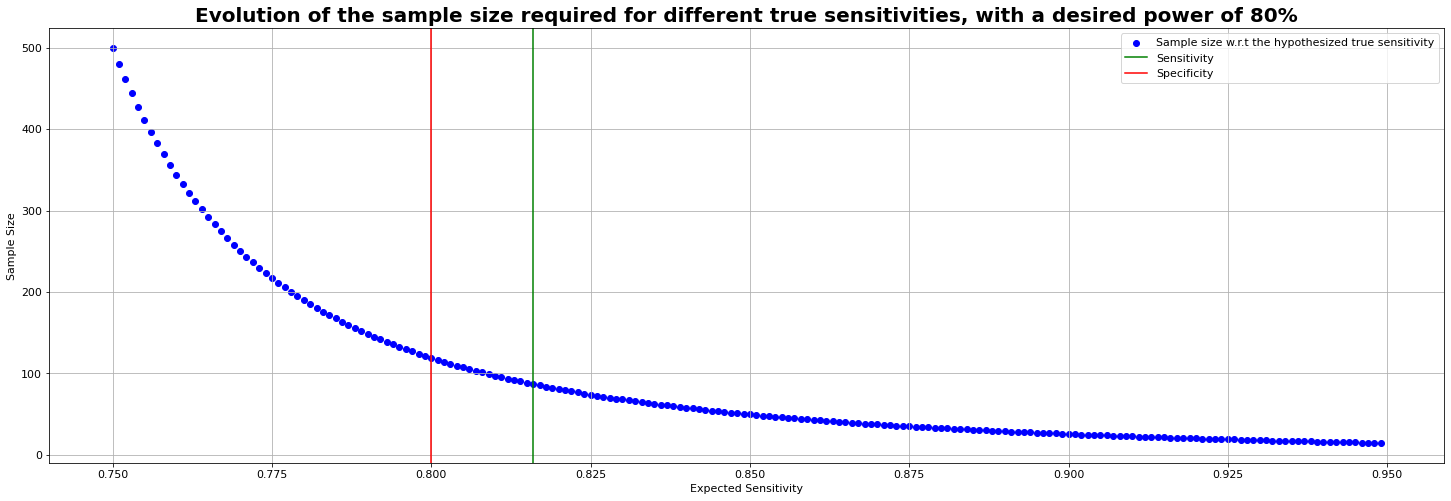

In [293]:
fi(25, 8)
plt.scatter(targets, SS, color = "b", label="Sample size w.r.t the hypothesized true sensitivity"); plt.ylabel("Sample Size"); plt.xlabel("Expected Sensitivity")
plt.title("Evolution of the sample size required for different true sensitivities, with a desired power of 80%", weight='bold', fontsize=20)
plt.axvline(0.816, color='green', label = "Sensitivity")
plt.axvline(0.800, color='red',  label = "Specificity")
plt.legend(); plt.grid()
None

#abline(h = seq(0,500, by = 50), lty = 2, col = "gray")

In [290]:
sample_size(.7,.8)

118.90051310719637

# Analysis of the quality score

In [79]:
weighted_confidence_score  = np.load(os.path.join(DATA_DIR, 'multimodal_paper', 'weight_multimodal.npy'))

In [80]:
np.quantile(weighted_confidence_score, [0.25, 0.5, 0.75])

array([0.90019848, 0.93969214, 0.9839179 ])

In [48]:
np.quantile(weighted_confidence_score, [0.25, 0.5, 0.75])

array([0.87583575, 0.92636503, 0.98036401])

In [66]:
idx_nt = np.array(data.df[data.df['diagnosis'] == 0].index)
idx_asd = np.array(data.df[data.df['diagnosis'] == 1].index)
idx_ddld = np.array(data.df[data.df['diagnosis'] == 2].index)

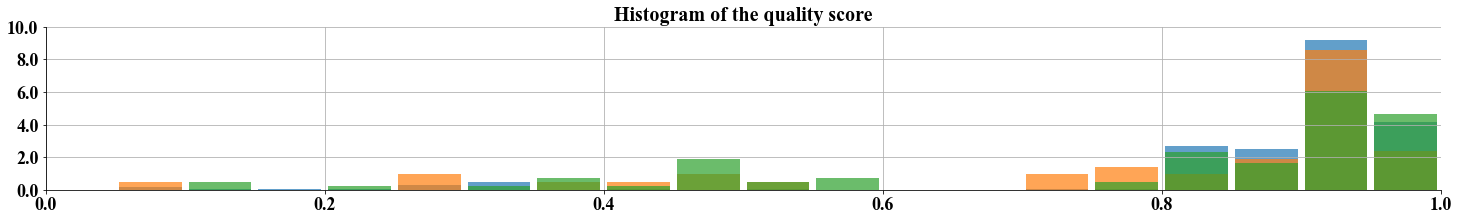

In [72]:
csfont = {'fontname':'Times New Roman'}
#weighted_confidence_score = np.multiply(conf_values, general_shap_values_normalized).sum(axis=1)
fi(25, 3)
plt.title("Histogram of the quality score", weight='bold', fontsize=20, **csfont)
plt.hist(weighted_confidence_score[idx_nt], density=True, color='tab:blue', alpha=.7, bins=np.arange(0, 1.05, 0.05), rwidth=.9)
plt.hist(weighted_confidence_score[idx_asd], density=True,color='tab:orange', alpha=.7, bins=np.arange(0, 1.05, 0.05), rwidth=.9)
plt.hist(weighted_confidence_score[idx_ddld],density=True, color='tab:green', alpha=.7, bins=np.arange(0, 1.05, 0.05), rwidth=.9)

#plt.xticks(ticks = np.arange(features_importances_extended.shape[0]), labels=[feature_name_mapping[f] for f in np.array(labels)[idx_sorting]], rotation =90)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.xlim([0, 1])
plt.gca().set_yticks(plt.gca().get_yticks(), np.round(plt.gca().get_yticks(), 2).astype(str), weight='bold', fontsize=18, **csfont)
plt.gca().set_xticks(plt.gca().get_xticks(), np.round(plt.gca().get_xticks(), 2).astype(str), weight='bold', fontsize=18, **csfont)
plt.grid()
#plt.savefig(os.path.join(ROOT_DIR, 'figures', 'compliance_score_hist.png'), dpi=200, bbox_inches = 'tight', facecolor=plt.gcf().get_facecolor(), edgecolor='none')
None

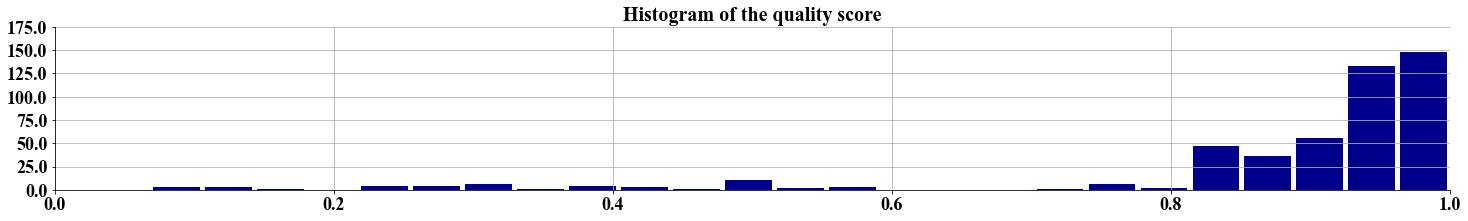

In [43]:
csfont = {'fontname':'Times New Roman'}
#weighted_confidence_score = np.multiply(conf_values, general_shap_values_normalized).sum(axis=1)
fi(25, 3)
plt.title("Histogram of the quality score", weight='bold', fontsize=20, **csfont)
plt.hist(weighted_confidence_score.flatten(), color='darkblue', bins=25, rwidth=.9)

#plt.xticks(ticks = np.arange(features_importances_extended.shape[0]), labels=[feature_name_mapping[f] for f in np.array(labels)[idx_sorting]], rotation =90)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.xlim([0, 1])
plt.gca().set_yticks(plt.gca().get_yticks(), np.round(plt.gca().get_yticks(), 2).astype(str), weight='bold', fontsize=18, **csfont)
plt.gca().set_xticks(plt.gca().get_xticks(), np.round(plt.gca().get_xticks(), 2).astype(str), weight='bold', fontsize=18, **csfont)
plt.grid()
plt.savefig(os.path.join(ROOT_DIR, 'figures', 'compliance_score_hist.png'), dpi=200, bbox_inches = 'tight', facecolor=plt.gcf().get_facecolor(), edgecolor='none')
None

# Further custom analysis for the paper

In [18]:
from utils import create_autism_df
df = create_autism_df(folder_names = ['multimodal_paper_final'])

100%|██████████| 1001/1001 [06:11<00:00,  2.69it/s]


In [19]:
from utils import compute_performances
performances_df = compute_performances(df)

#Get important info 

optimal_threshold = performances_df['optimal_threshold'].item()
conslusiveness_score = performances_df.iloc[0]['y_pred']
y_true = performances_df.iloc[0]['y_true']

performances_df 

,name,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,F2,F2 Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)",Std - Sensitivity,"Specificity, selectivity or true negative rate (TNR)",Std - Specificity,Precision or positive predictive value (PPV),Corrected Precision or positive predictive value (PPV),Corrected NPV,Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV),TP,TN,FP,FN,optimal_threshold,num_samples,TN_normalized,TP_normalized,FP_normalized,FN_normalized,N,y_true,y_pred,Hanley_CI
\n(N=377),\n(N=377),0.899,0.622,0.935,0.222,0.953,0.545,0.161,0.712,0.315,0.817,0.513,0.878,0.041,0.808,0.022,0.406,0.088,0.997,0.978,0.122,0.594,0.022,43,265,63,6,0.378,377,70.291777,11.405836,16.710875,1.591512,377,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...","[0.001, 1.0, 0.001, 0.775, 0.27, 0.283, 0.177,...",0.030085


**Among the three participant without mchat, one autistic and one nt are always correlcty classified, but one is tangent and so we dive into the trianing that led to correct and incorrect classification. this could be used to label inconclusive cases**

In [35]:
df_subgroup_analysis = deepcopy(performances_df)

th = 0.2

index_conclusive = np.argwhere((((conslusiveness_score <= th) | (conslusiveness_score >= 1-th)) & ((y_true==0)))).flatten()

print("N positively screened: {}".format(len(index_subgroup)))

index_conclusive_nt = np.argwhere((((conslusiveness_score <= th) | (conslusiveness_score >= 1-th)) & ((y_true==0)))).flatten()
print("Conclusive NT administration: {}".format(len(index_conclusive_nt)))

index_conclusive_asd = np.argwhere((((conslusiveness_score <= th) | (conslusiveness_score >= 1-th)) & ((y_true==1)))).flatten()

print("Conclusive autistic administration: {}".format(len(index_conclusive_asd)))


N positively screened: 3
Conclusive NT administration: 270
Conclusive autistic administration: 41


In [76]:
from sklearn.metrics import  (confusion_matrix, roc_curve, fbeta_score, roc_auc_score, average_precision_score)
from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve

cm = np.zeros((2, 2))
result_kid = []
for i, row in df_subgroup_analysis.iterrows():
    index_subgroup = np.array(data.df[data.df['mchat_result'].isnull()].index)

    y_true = row['y_true'][index_subgroup]
    y_pred = row['y_pred'][index_subgroup]
    cm += confusion_matrix(row['y_true'][index_subgroup], row['y_pred'][index_subgroup]> row['optimal_threshold'])
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #disp.plot(cmap='Blues');disp.im_.colorbar.remove()  
    result_kid.append((y_pred >row['optimal_threshold']).astype(int))
    
    
print(index_subgroup)
result_kid

[ 47 244 376]


[array([1, 1, 0])]

In [41]:

optimal_threshold = performances_df['optimal_threshold'].item()
conslusiveness_score = performances_df.iloc[0]['y_pred']
y_true = performances_df.iloc[0]['y_true']

performances_df 

,name,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,F2,F2 Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)",Std - Sensitivity,"Specificity, selectivity or true negative rate (TNR)",Std - Specificity,Precision or positive predictive value (PPV),Corrected Precision or positive predictive value (PPV),Corrected NPV,Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV),TP,TN,FP,FN,optimal_threshold,num_samples,TN_normalized,TP_normalized,FP_normalized,FN_normalized,N,y_true,y_pred,Hanley_CI
\n(N=377),\n(N=377),0.899,0.622,0.935,0.222,0.953,0.545,0.161,0.712,0.315,0.817,0.513,0.878,0.041,0.808,0.022,0.406,0.088,0.997,0.978,0.122,0.594,0.022,43,265,63,6,0.378,377,70.291777,11.405836,16.710875,1.591512,377,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...","[0.001, 1.0, 0.001, 0.775, 0.27, 0.283, 0.177,...",0.030085


array([0.466, 0.972, 0.   ])

In [49]:
print("Index of the kids without MCHAT: {}".format(index_subgroup))
print("Diagnosis of the kids without MCHAT: {}".format(data.df['diagnosis'][index_subgroup].to_numpy()))
print("Prediction score of the kids without MCHAT: {}".format(conslusiveness_score[index_subgroup]))
print("Prediction of the kids without MCHAT: {}".format(conslusiveness_score[index_subgroup] >= optimal_threshold))

Index of the kids without MCHAT: [ 47 244 376]
Diagnosis of the kids without MCHAT: [1. 1. 0.]
Prediction score of the kids without MCHAT: [0.466 0.972 0.   ]
Prediction of the kids without MCHAT: [ True  True False]


Index of the kids with MCHAT neg: N=334


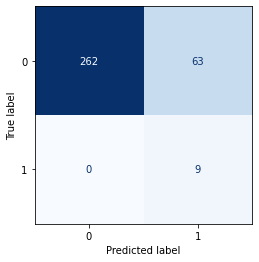

In [77]:
from sklearn.metrics import  (confusion_matrix, roc_curve, fbeta_score, roc_auc_score, average_precision_score)
from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve

cm = np.zeros((2, 2))
result_kid = []
for i, row in df_subgroup_analysis.iterrows():
    index_subgroup = np.array(data.df[data.df['mchat_result'] == 0].index)

    y_true = row['y_true'][index_subgroup]
    y_pred = row['y_pred'][index_subgroup]
    cm += confusion_matrix(row['y_true'][index_subgroup], row['y_pred'][index_subgroup]> row['optimal_threshold'])
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #disp.plot(cmap='Blues');disp.im_.colorbar.remove()  
    result_kid.append((y_pred >row['optimal_threshold']).astype(int))
    
tn, fp, fn, tp = confusion_matrix(data.df['diagnosis'][index_subgroup].to_numpy(), conslusiveness_score[index_subgroup] >= optimal_threshold).ravel()

print("Index of the kids with MCHAT neg: N={}".format(len(index_subgroup)))
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(data.df['diagnosis'][index_subgroup].to_numpy(), conslusiveness_score[index_subgroup] >= optimal_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');disp.im_.colorbar.remove()

Index of the kids with MCHAT neg: N=40


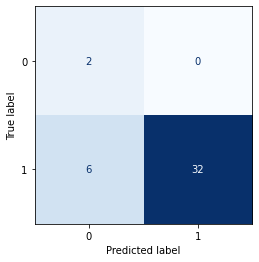

In [78]:
from sklearn.metrics import  (confusion_matrix, roc_curve, fbeta_score, roc_auc_score, average_precision_score)
from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve

cm = np.zeros((2, 2))
result_kid = []
for i, row in df_subgroup_analysis.iterrows():
    index_subgroup = np.array(data.df[data.df['mchat_result'] == 1].index)

    y_true = row['y_true'][index_subgroup]
    y_pred = row['y_pred'][index_subgroup]
    cm += confusion_matrix(row['y_true'][index_subgroup], row['y_pred'][index_subgroup]> row['optimal_threshold'])
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #disp.plot(cmap='Blues');disp.im_.colorbar.remove()  
    result_kid.append((y_pred >row['optimal_threshold']).astype(int))
    
tn, fp, fn, tp = confusion_matrix(data.df['diagnosis'][index_subgroup].to_numpy(), conslusiveness_score[index_subgroup] >= optimal_threshold).ravel()

print("Index of the kids with MCHAT neg: N={}".format(len(index_subgroup)))
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(data.df['diagnosis'][index_subgroup].to_numpy(), conslusiveness_score[index_subgroup] >= optimal_threshold)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');disp.im_.colorbar.remove()